<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.503 · Programación para la ciencia de datos</p>
    <p style="margin: 0; text-align:right;">Grado en Ciencia de Datos Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Programación para la ciencia de datos
============================

--- 

Unidad 6: Testing, mantenimiento y despliegue de aplicaciones Python
-----------------------------------------------------

---

### Manual de instrucciones

Este documento es un notebook interactivo que intercala explicaciones más bien teóricas de conceptos de programación con fragmentos de código ejecutables. Para aprovechar las ventajas que aporta este formato, se recomienda, en primer lugar, leer las explicaciones y el código que os proporcionamos. De esta manera tendréis un primer contacto con los conceptos que se exponen. Ahora bien, **¡la lectura es solo el principio!** Una vez que hayáis leído el contenido proporcionado, no olvidéis ejecutar el código proporcionado y modificarlo para crear variantes, que os permitan comprobar que habéis entendido su funcionalidad y explorar los detalles de la implementación. Por último, se recomienda también consultar la documentación enlazada para explorar con más profundidad las funcionalidades de los módulos presentados.

In [1]:
%load_ext pycodestyle_magic

In [2]:
%pycodestyle_on

### Introducción

En esta unidad veremos cómo programar en Python sin utilizar notebooks de jupyter. Así, comentaremos cómo utilizar archivos planos de código Python como fuente del código, y discutiremos sobre cómo organizarlos para facilitar la legibilidad y el mantenimiento de las aplicaciones.

Después, explicaremos (con más detalle de lo que hemos hecho hasta ahora), cómo funciona la gestión de librerías de Python con `pip`, y presentaremos los entornos virtuales, que permiten crear entornos de programación aislados en los que ejecutar los proyectos.

A continuación, presentaremos dos herramientas que se utilizan en el desarrollo de *software*: los sistemas de control de versiones y los entornos de desarrollo integrados (*IDE*), y presentaremos dos de los más utilizados ( `git` para control de versiones y PyCharm como IDE).

Finalmente, describiremos el concepto de test unitario, y veremos cómo implementarlos en Python usando `unittest`.

A continuación se incluye la tabla de contenidos, que podéis utilizar para navegar por el documento:

<ul style="list-style-type:none">
<li> <a href='#1.--Introducción'> 1. Introducción </a> </li>
<li> <a href="#2.--Organización-y-distribución-de-código-Python"> 2. Organización y distribución de código Python </a> </li>
    <ul style="list-style-type:none">
<li> <a href="#2.1.--El-uso-de-notebooks-de-jupyter"> 2.1. El uso de notebooks de jupyter </a> </li>
<li> <a href="#2.2.--Ejecución-de-código-Python-en-ficheros-planos"> 2.2. Ejecución de código Python en ficheros planos </a> </li>
<li> <a href='#2.3.--Organización-de-código'> 2.3. Organización de código </a> </li>
<li> <a href='#2.4.--Gestión-de-librerías'> 2.4. Gestión de librerías </a> </li>
        <ul style="list-style-type:none">
<li> <a href='#2.4.1.--Fichero-de-requerimientos'> 2.4.1. Archivo de requerimientos </a> </li>
<li> <a href='#2.4.2.--Entornos-virtuales'> 2.4.2. Entornos virtuales </a> </li>
        </ul>
    </ul>
<li> <a href="#3.--Control-de-versiones-y-trabajo-colaborativo"> 3. Control de versiones y trabajo colaborativo </a> </li>
    <ul style="list-style-type:none">
<li> <a href="#3.1.--Comandos-básicos-de-git"> 3.1. Comandos básicos de git </a> </li>
    </ul>
<li> <a href="#4.--Testing-y-mantenimiento-de-aplicaciones"> 4. Testing y mantenimiento de aplicaciones </a> </li>
<li> <a href="#5.--Estructura-de-un-proyecto-Python"> 5. Estructura de un proyecto Python </a> </li>
<li> <a href="#6.--Entornos-de-desarrollo-integrado"> 6. Entornos de desarrollo integrado </a> </li>
    <ul style="list-style-type:none">
<li> <a href="#6.1.--Funcionalidades-de-un-IDE"> 6.1. Funcionalidades de un IDE </a> </li>
<li> <a href="#6.2.--Creación-de-proyectos-de-Python-con-PyCharm"> 6.2. Creación de proyectos de Python con PyCharm </a> </li>
    </ul>
<li> <a href='#7.--Ejercicios-para-practicar'> 7. Ejercicios para practicar </a> </li>
    <ul style="list-style-type:none">
<li> <a href='#7.1.--Soluciones-a-los-ejercicios-para-practicar'> 7.1. Soluciones a los ejercicios para practicar </a> </li>
    </ul>
<li> <a href='#8.--Bibliografía'> 8. Bibliografía </a> </li>
    <ul style="list-style-type:none">
<li> <a href='#8.1.--Bibliografía-básica'> 8.1. Bibliografía básica </a> </li>
<li> <a href='#8.2.--Bibliografía-adicional---Ampliación-de-conocimientos'> 8.2. Bibliografía adicional </a> </li>
    </ul>
</ul>

**Importante**:

**Nota:** Antes de ejecutar el código de este notebook, es necesario instalar una librería adicional. Para instalar librerías en Python, utilizaremos `pip`, el instalador de paquetes de Python.

Abrid ahora una consola y ejecutad la siguiente instrucción, que instala el paquete `virtualenv`, que utilizaremos para crear entornos virtuales (la contraseña solicitada es `datasci`):

```
sudo pip install virtualenv
```
Solo es necesario realizar este paso **una única vez**.

# 1.- Introducción

En la asignatura hemos utilizado notebooks de jupyter para programar en Python. Como habéis podido comprobar, los notebooks de jupyter son un entorno interactivo, que permite combinar la ejecución de código (en nuestro caso, en Python), con explicaciones textuales, que pueden incluir fórmulas matemáticas, imágenes, y otro contenido multimedia.

Los notebooks de jupyter son una buena alternativa para generar documentos como los que hemos estado utilizando, que combinan código, explicaciones, y visualizaciones. Además, son fáciles de compartir, y permiten mostrar visualmente los resultados de análisis de datos. Por este motivo son utilizados habitualmente como herramienta para presentar y compartir resultados, y también como herramienta de prototipado. Aunque las características de los notebooks los hacen muy adecuados para este tipo de tareas, en ciertas situaciones los notebooks no serán la mejor alternativa para programar en Python. Es el caso, por ejemplo, de programas con muchas líneas de código, muy complejos, o en los que colabora un equipo de desarrolladores.

En estos casos, será más práctico utilizar ficheros planos de Python, donde el código puede estar organizado (facilitando el mantenimiento de código largo), que pueden ser fácilmente controlados por sistemas de control de versiones (imprescindibles para la colaboración de equipos), y para los que disponemos de herramientas de desarrollo más avanzadas que un navegador web.

En esta unidad, explicaremos cómo programar en Python fuera de los notebooks de jupyter, y veremos una serie de herramientas y procesos que se utilizan en el contexto del desarrollo de software, que nos serán útiles para desarrollar aplicaciones complejas.


# 2.- Organización y distribución de código Python

## 2.1.- El uso de notebooks de jupyter

Hasta ahora hemos estado programando en Python utilizando *notebooks* de jupyter, que visualizamos, editamos y ejecutamos con un navegador accediendo a un pequeño servidor web que desplegamos en local (en nuestra máquina). En esta unidad, presentaremos una de las alternativas más extendidas para programar en Python, que es el uso de archivo planos que contienen código Python.

En primer lugar, revisaremos la arquitectura que estamos utilizando actualmente para acceder al contenido de la asignatura.

![Arquitectura](img/arquitectura_ib.png)

Por un lado, para empezar a trabajar ejecutamos el *script* `start_uoc.sh` en la máquina virtual. Este *script* levanta un servidor de jupyter en local (dentro de nuestra máquina), ejecuta un navegador web (en nuestro caso, Firefox), y abre una pestaña dentro de este navegador que carga la url `http://localhost:8888`. Esta url apunta a la raíz del servidor web incorporado en jupyter, y nos permite navegar por el sistema de ficheros de nuestra máquina y visualizar los notebooks gráficamente.

Ahora bien, ¿como son estos *notebooks* cuando los visualizamos en texto plano? Pues bien, los archivos `.ipynb` (la extensión proviene de *ipython notebooks*, que es como se les conocía en el pasado) son archivos json, que contienen diferentes celdas. Cada celda es de un tipo, que determina como la visualizaremos. Así, por ejemplo, disponemos de celdas de *markdown* (como la celda donde se encuentra este texto que estáis leyendo) y de celdas de código (que contienen código Python que se puede interpretar y ejecutar). A continuación se incluye un ejemplo del contenido json que se encuentra en un fichero `.ipynb` (en este caso, corresponde a un fragmento de la primera unidad de la asignatura):


```
{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# 1.- Estructuras de datos para almacenar colecciones de valores"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "The list is:\n",
      "\t[1, 1, 3.5, 'strings also', [None, 4]]\n",
      "After appending 5 and removing 3.5:\n",
      "\t[1, 1, 'strings also', [None, 4], 5]\n"
     ]
    }
   ],
   "source": [
    "# Las listas pueden ser heteogéneas y tener duplicados\n",
    "a_list = [1, 1, 3.5, \"strings also\", [None, 4]]\n",
    "print(\"The list is:\\n\\t{}\".format(a_list))\n",
    "\n",
    "# Las listas son mutables y ordenadas\n",
    "a_list.append(5)\n",
    "a_list.remove(3.5)\n",
    "print(\"After appending 5 and removing 3.5:\\n\\t{}\".format(a_list))"
   ]
  },
  ...
]
}
```

Fijaos como las celdas de texto (es decir, las que tienen como `cell_type` el valor `markdown`) sólo contienen un campo `source` con el texto, mientras que las celdas de código (las que tienen como `cell_type` el valor` code`) tienen información adicional, como el contador de ejecución (`execution_count`) o la salida generada por el código al ejecutarlo (`outputs`).

Con respecto a las celdas de código, el servidor de jupyter se encarga de ejecutar el código con el intérprete de Python y de recuperar la salida, que se incrusta luego en el *notebook* (y se muestra al usuario a través del navegador web).

## 2.2.- Ejecución de código Python en ficheros planos

Una de las alternativas que podemos utilizar para ejecutar código Python sin utilizar jupyter es escribir el código en ficheros planos, que se ejecutarán directamente con el intérprete de Python.

Los ficheros planos de Python son archivos de texto que contienen código fuente escrito en Python y que tienen la extensión `.py`. Estos archivos contendrían el código que hemos estado programando en celdas de código en los *notebooks*. Del mismo modo que el código en los *notebooks*, el código Python en texto plano puede contener comentarios (ya sean de una sola línea, comenzados con `#`; o multilínea, delimitados con `'''`), y estará indentado siguiendo la sintaxis de Python.

Para editar estos archivos, utilizaremos un editor de texto plano, o bien un entorno de desarrollo integrado (en inglés, se conoce como IDE, de *integrated development environment*).

![Arquitectura-python-plano](img/py_ib.png)


Cuando estos archivos contienen un fragmento de código pensado para ser ejecutado **sólo** de manera directa por el usuario normalmente lo llamamos **_script_ de Python**; mientras que si el código está pensado para poderse importar desde otro archivo de Python lo llamamos **módulo**.

En la carpeta `python_code` hay un ejemplo de módulo en Python muy simple (` hello_world.py`), que está pensado para poderse importar, pero también para ejecutarse directamente.

El contenido del archivo es el siguiente:

```
#!/usr/bin/ python
# -*- coding: utf-8 -*-


def to_upper(x):
	return x.upper()


if __name__ == "__main__":
	print(to_upper("Hello world!"))

```

Notad como el archivo contiene únicamente código (y comentarios de código), pero no texto en *markdown* ni imágenes como podemos tener en los *notebooks*.

Por otra parte, el código tiene dos partes diferenciadas:
* La definición de la función `to_upper`.
* Un `print` de un mensaje.

El `print` se encuentra dentro de un bloque `if`, que comprueba si la variable `__name__` es igual a la cadena de caracteres `__main__`. La variable `__name__` es una variable especial asignada por el intérprete de Python, que toma el valor `__main__` cuando el archivo se ejecuta como programa principal. En cambio, cuando se importa como módulo, la variable toma el nombre del módulo. Cuando se programan módulos que pueden ser utilizados tanto importados desde otros programas como como programas principales, es habitual utilizar esta construcción para indicar qué debe hacer el programa cuando se ejecuta como programa principal.

Por lo tanto, si ejecutamos este código como programa principal, se mostrará el mensaje `HELLO WORLD!` por pantalla, mientras que si lo importamos como módulo desde otro programa, este mensaje no se mostrará. En cuanto a la definición de la función `to_upper`, ésta siempre se ejecutará, ya que no se encuentra dentro del bloque `if`.

Para ejecutar este código Python como programa principal, nos situaremos en la carpeta desde un terminal, y ejecutaremos la siguiente instrucción:

```
$ python hello_world.py
```

Esto ejecutará el código, que mostrará por pantalla el mensaje `HELLO WORLD!`.

Por otro lado, podemos importar este archivo como módulo dentro de nuestro código Python usando la instrucción `import` (como ya hemos estado haciendo con las librerías que hemos ido utilizando en la asignatura).

In [3]:
from python_code import hello_world

Una vez importado el módulo, podemos hacer servir las funciones que se han implementado:


In [4]:
hello_world.to_upper("test message")

'TEST MESSAGE'

Tened en cuenta que, al importar el módulo, el mensaje `HELLO WORLD!` no se ha mostrado. Por otro lado, fijaos como, en este caso, hemos importado el módulo desde un *notebook*, pero esto no tiene por qué ser siempre así. También se pueden importar módulos desde otros módulos u otros *scripts* de Python, programados en ficheros planos de código.

## 2.3.- Organización de código

Ya hemos visto un par de maneras de organizar código Python: con el uso de funciones y utilizando clases. Tanto las funciones como las clases permiten segmentar el código, por funcionalidades o por entidades (respectivamente), lo que ayuda a crear código claro, reutilizable y fácilmente mantenible. Ahora bien, imaginemos un código que dispone de un millar de funciones, todas ellas codificadas en un mismo *notebook* de jupyter o archivo de código Python plano. Por muy bien documentadas que estén estas funciones, mantener este código o, incluso, usarlo, es una tarea muy compleja.

Para trabajar con programas con muchas líneas de código, lo que se hace es separar diferentes fragmentos de código en diferentes archivos (que, como ya hemos comentado, llamaremos **módulos**), y organizar estos archivos en **paquetes** (conjuntos de módulos).

De hecho, ya hemos utilizado módulos externos (importándolos en nuestros *notebooks*) durante toda la asignatura. Ahora bien, hasta ahora no habíamos visto como podíamos crear estos módulos, ni habíamos reflexionado sobre sus implicaciones a nivel del diseño de aplicaciones. Pues bien, un módulo no es más que un archivo python, que puede contener tanto instrucciones como definiciones de funciones (como hemos visto en el ejemplo del apartado anterior).

Los paquetes son conjuntos de módulos, estructurados de manera jerárquica. En cuanto a la estructura del código fuente, podemos definir esta estructura jerárquica usando carpetas. Por ejemplo, fijémonos en la estructura de carpetas que presenta [el paquete `networkx`](https://github.com/networkx/networkx/tree/master/networkx) (que ofrece representaciones y funciones sobre grafos), de la que reproducimos un subconjunto a continuación:

```
networkx
    __init__.py
    algorithms
        __init__.py
        community
            __init__.py
            centrality.py
            modularity_max.py
            ...
        ...
    classes
    drawing
    generators
    linalg
    ...
```

El paquete `networkx` contiene varias carpetas, que a la vez contienen otras carpetas que contienen archivos de código en python con extensión `.py`. Así, por ejemplo, el módulo `centrality`, se encuentra dentro de `community`, que a la vez está en `algorithms`. La estructura de carpetas define pues la jerarquía de los paquetes.

Es interesante notar que las carpetas contienen un archivo `__init __.py`: este archivo es necesario para indicarle a Python que debe tratar esta carpeta como paquete y, por tanto, para poder importarlo después desde otras aplicaciones. El archivo `__init __.py` es un archivo python normal, y puede estar vacío (de hecho, a menudo estará vacío) o bien puede contener código de inicialización para el paquete. En este último caso, el archivo contendrá el código a ejecutar en el momento de la importación.

En cuanto a la importación de los paquetes, podemos o bien importar todo el paquete entero, o bien importar sólo alguno de los submódulos que lo conforman o, incluso, importar funciones o clases concretas. Así, por ejemplo, podemos importar el paquete `networkx` con:

In [5]:
# Importamos el paquete networkx
import networkx

# Creamos un grafo de networkx
g = networkx.Graph()

Ahora bien, este tipo de importación no es muy eficiente: por un lado, si sólo necesitamos algún módulo o función concreta de la librería `networkx`, no querremos importarlo entero; por otra parte, tener que escribir `networkx` cada vez que usamos alguna definición del paquete, es tedioso.

En cuanto a esta segunda problemática, Python permite asignar un nuevo nombre dentro de nuestra aplicación a las importaciones, utilizando la palabra clave `as`:


In [6]:
# Importamos el paquete networkx como nx
import networkx as nx

# Creamos un grafo de networkx
g = nx.Graph()

Ahora, podemos utilizar `nx` dentro de nuestro código para referirnos a` networkx`.

Por otra parte, con respecto a la importación de más definiciones de las que realmente se necesitan, Python permite importar sólo un módulo concreto dentro del paquete. Por ejemplo, podemos importar el módulo `centrality`, haciendo:


In [7]:
import networkx.algorithms.community.centrality

o bien:


In [8]:
from networkx.algorithms.community import centrality

Si la unidad que queremos importar es un módulo o un paquete, podemos utilizar las dos sintaxis de importación. Ahora bien, si lo que queremos importar es una clase, una función o una variable que se encuentra definida dentro de un módulo, sólo podremos utilizar la segunda sintaxis. Veamos, por ejemplo, como importar la función `girvan_newman` que se encuentra en subpaquet` centrality`:


In [9]:
# Importación correcta de la función girvan_newman
from networkx.algorithms.community.centrality import girvan_newman

In [10]:
# Importación incorrecta, que genera una excepción
try:
    import networkx.algorithms.community.centrality.girvan_newman
except ModuleNotFoundError as e:
    print(e)

No module named 'networkx.algorithms.community.centrality.girvan_newman'; 'networkx.algorithms.community.centrality' is not a package


Ya hemos visto pues como podemos crear módulos y paquetes en Python, y cómo podemos importarlos para usarlos en otras aplicaciones. Llegados a este punto y en cuanto a la creación de nuestros propios paquetes en Python, en deberíamos plantear pues como hemos de estructurar nuestros proyectos de código. En esta sección, describiremos algunas ideas en cuanto a la estructura de los ficheros de código Python. Después, en el apartado 5, hablaremos de cómo podemos estructurar los proyectos más allá de nuestro código (considerando detalles como la documentación, la licencia, los requerimientos, etc.).

No hay una receta mágica que contenga un conjunto de reglas a seguir para estructurar el código de un proyecto en módulos y paquetes. Para un mismo proyecto, existen muchísimas maneras de estructurarlo y, a menudo, será difícil decidir cuál de ellas es la *mejor*, en tanto que algunas decisiones de diseño sacrificarán algún beneficio para conseguir algún otro. En todo caso, algunas buenas prácticas a seguir son:

* Hay que intentar promover la **simplicidad** y la **legibilidad** de nuestro código, así como evitar estructuras con muchos niveles de composición. Así, es recomendable que la estructura de paquetes y módulos que creamos para nuestro proyecto sea simple, y añadir complejidad sólo si es necesario para facilitar la comprensión u organización. Asimismo, también es importante que el código sea fácilmente legible, por lo que habrá que prestar especial atención a los **nombres de los paquetes y módulos**, para intentar que transmitan el máximo de información posible.

    El [PEP20](https://www.python.org/dev/peps/pep-0020/) contiene una recopilación de principios para programar en Python en forma de aforismos, algunos de los cuales son aplicables a la estructura del código y de los que se derivan las propiedades que acabamos de mencionar. Las primeras líneas del PEP20 son las siguientes:

```
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
...
```

* Hay que intentar **organizar** el código en módulos y paquetes de manera que sea fácil para un lector encontrar donde debería estar una determinada definición. En este sentido, a menudo es interesante agrupar las funcionalidades que abordan un mismo concepto en la aplicación. Normalmente, interesará minimizar el acoplamiento de los módulos, haciendo que cada módulo necesite conocer el mínimo de información posible sobre el funcionamiento de los otros módulos.

    Siguiendo con el ejemplo de `networkx`, el paquete` community` contiene módulos relacionados con la detección de comunidades: el módulo `centrality` implementa la detección de comunidades utilizando el algoritmo de Girvan-Newman; el módulo `klique` utilizando la definición de comunidades basada en la subestructura del *k*-clique; el módulo `label_progagation` utilizando un algoritmo de propagación de etiquetas, etc.
    
    Asimismo, el paquete `community` forma parte del paquete `algorithms`, que agrupa varios algoritmos sobre redes. Dentro de `algorithms`, encontramos el paquete `community`, que agrupa a los algoritmos de detección de comunidades; el paquete `shortest_paths`, que agrupa algoritmos de cálculo de los caminos más cortos; el paquete `flow`, que contiene algoritmos basados en flujos, etc.


* Hay que intentar **evitar la repetición** de código. En casi todos los proyectos hay fragmentos de código que pueden ser aprovechados con una pequeña variación en varios lugares. En estos casos, lo más rápido suele ser simplemente copiar el código en estos diversos lugares, y hacer las pequeñas adaptaciones que permitan ajustarlo a la funcionalidad deseada en cada lugar. Aunque esta opción sea más rápida, en general hay que intentar evitarla, ya que genera código difícil de mantener. Por ejemplo, si se detecta un error en este fragmento de código, para arreglarlo habrá que recordar todos los lugares donde el código se encuentra duplicado, y hacer la corrección en todos ellos. En general, es preferible intentar hacer una única versión del código, que sea capaz de gestionar las diversas casuísticas.


* Es importante hacer refacción del código (en inglés, hablamos de **_refactoring_**) cuando sea necesario. Llamamos *refactoring* al proceso de modificación del código con el objetivo de mejorarlo, sin cambiar su funcionalidad. En este contexto, mejorar el código implica limpiarlo, ordenarlo, hacerlo más eficiente, más mantenible, reutilizable, etc. Es importante hacer *refactoring* para mantener la calidad del código conforme el proyecto crece, pero también hay que valorar cuando es importante hacerlo, ya que supone una inversión de tiempo. En el contexto de la estructura del proyecto, será importante tener en cuenta las implicaciones que los cambios tengan en nuestro proyecto, así como en posibles proyectos que dependan de este.

    Si estáis interesados en aprender detalles adicionales sobre la estructuración de código Python en paquetes, os recomendamos la lectura de [el siguiente artículo](https://intermediate-and-advanced-software-carpentry.readthedocs.io/en/latest/structuring-python.html) del curso de programación en Python de T. Brown.

## 2.4.- Gestión de librerías

Python es un lenguaje de programación que dispone de muchos paquetes y módulos  externos (es decir, que no se encuentran en la [librería estándar de Python](https://docs.python.org/3/library/index.html)). Ya hemos visto en otras unidades que podemos instalar librerías Python usando `pip`. El software `pip` (de sus siglas en inglés, *Pip Installs Packages*) es un instalador de paquetes de Python que permite instalar paquetes que se encuentran en unos índices públicos. Para instalar un paquete, simplemente hay que ejecutar:

```
$ pip install nombrepaquete
```

Esto hará que se instale el paquete especificado, así como todas las dependencias que necesite para su ejecución.

También podemos instalar versiones concretas de un paquete, especificándolo en la instrucción de instalación. Así, por ejemplo,

```
$ pip install pandas == 0.25.3
```

instala la versión `0.25.3` de `pandas`.

Para desinstalar un paquete instalado con `pip`, sólo hay que ejecutarlo de nuevo con el argumento `uninstall`:

```
$ pip uninstall nombrepaquete
```

`pip` descarga los paquetes a instalar del *Python Package Index* ([PyPI](https://pypi.org/)), el índice de paquetes por defecto de la comunidad Python, que se encuentra abierto a todos los desarrolladores. Adicionalmente, se puede usar `pip` para instalar paquetes de otros índices, especificando la url con el *flag* `--index-url`.

### 2.4.1.- Fichero de requerimientos

El uso de librerías externas en Python facilita el desarrollo de programas (ya que los programadores pueden reutilizar código ya existente), pero al mismo tiempo puede dificultar la portabilidad de código entre diferentes máquinas (ya que un código que dependa de librerías externas no funcionará si estas librerías no se encuentran instaladas en el sistema). Además, a veces no sólo será necesario que las librerías estén instaladas, sino que será necesario que la versión instalada sea la misma para la que se desarrolló el código (ya que diferentes versiones de una misma librería pueden disponer de funciones diferentes, tener diferentes comportamientos por defecto, etc.).

Para ayudar a reproducir el entorno en el que un programa puede ejecutarse correctamente, en los proyectos de programación en Python se suele crear un archivo (llamado habitualmente `requirements.txt`) que contiene un listado de todas las dependencias del proyecto, es decir, de todas las librerías que hay que tener instaladas para ejecutar el código del proyecto. Adicionalmente, este archivo también puede especificar requisitos sobre las versiones de las librerías que hay que instalar, por ejemplo, indicando una versión concreta de una librería o bien la versión mínima que hay que tener.

A partir de un fichero de requerimientos, podemos utilizar `pip` para instalar todas las librerías necesarias para un proyecto usando el comando siguiente:

```
$ pip install -r requirements.txt
```

Además de gestionar la instalación de paquetes, `pip` también permite generar un fichero con todas las librerías instaladas en un entorno de Python:

```
$ pip freeze requirements.txt
```

Si ejecutamos el comando anterior en la máquina virtual de la asignatura, veréis que se genera una lista bastante grande, que contiene todas las librerías instaladas junto con su versión:

```
asn1crypto==0.24.0
attrs==19.1.0
Automat==0.7.0
backcall==0.1.0
bleach==3.1.0
catfish==1.4.4
certifi==2018.1.18
chardet==3.0.4
command-not-found==0.3
constantly==15.1.0
cryptography==2.1.4
cssselect==1.0.3
cupshelpers==1.0
cycler==0.10.0
decorator==4.4.0
defer==1.0.6
defusedxml==0.6.0
distro-info===0.18ubuntu0.18.04.1
entrypoints==0.3
flake8==3.7.9
future==0.17.1
geoplotlib==0.3.2
googlemaps==3.0.2
httplib2==0.9.2
hyperlink==19.0.0
idna==2.6
incremental==17.5.0
ipykernel==5.1.1
ipython==7.6.0
ipython-genutils==0.2.0
ipywidgets==7.4.2
jedi==0.14.0
Jinja2==2.10.1
joblib==0.13.2
jsonschema==3.0.1
jupyter==1.0.0
jupyter-client==5.2.4
jupyter-console==6.0.0
jupyter-core==4.5.0
keyring==10.6.0
keyrings.alt==3.0
kiwisolver==1.1.0
language-selector==0.1
launchpadlib==1.10.6
lazr.restfulclient==0.13.5
lazr.uri==1.0.3
lightdm-gtk-greeter-settings==1.2.2
line-profiler==3.0.2
lxml==4.4.0
MarkupSafe==1.1.1
matplotlib==3.1.1
...
```

Ahora bien, la salida que hemos obtenido del `pip freeze` **no** sería adecuada como contenido de un fichero de requerimientos para nuestro proyecto. Si os fijáis, contiene muchas librerías, y no sólo las que hemos instalado nosotros explícitamente en el sistema. Esto se debe a que algunas librerías tienen dependencias de otras librerías. Estas dependencias se instalan en nuestro sistema al instalar la librería objetivo, y se añaden también a la lista generada por `pip freeze`, pero detallarlas en el archivo de requerimientos de nuestro proyecto puede ser contraproducente ya que aumentan la complejidad de la gestión. Por ejemplo, al instalar la librería `matplotlib` que usamos para generar gráficas, se instala `kiwisolver` como dependencia. Pero nosotros no estamos interesados en tener la versión 1.1.0 de `kiwisolver`, o ni siquiera en tener la librería `kiwisolver` instalada, más allá de que sea necesaria para poder disponer de `matplotlib`: si en un futuro `matplotlib` deja de necesitar utilizar `kiwisolver`, entonces nuestro proyecto tampoco la necesitará. Por lo tanto, es mejor no especificar esta dependencia en el archivo de requerimientos de nuestro proyecto: queremos especificar `matplotlib`, que es la librería que usamos.

### 2.4.2.- Entornos virtuales

Además de la gestión de librerías que permita asegurar la portabilidad de nuestro código, a veces los programadores de Python también se pueden encontrar con conflictos en cuanto a las necesidades de los diversos proyectos en los que trabajan. Así, por ejemplo, imaginad que estáis trabajando en un proyecto de análisis de datos que necesita como mínimo la versión 1.0 de la librería `pandas` (ya que utiliza el método [`to_markdown`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_markdown.html#pandas.DataFrame.to_markdown) para mostrar unos *dataframes* en formato *markdown*, y este método es nuevo de la versión 1.0) y, al mismo tiempo, estáis trabajando en otro proyecto que necesita tener como mucho la versión 0.25 de la misma librería (ya que utiliza `SparseSeries` para representar series de datos *sparse*, y este tipo de datos desaparece en versiones posteriores de la librería). A largo plazo, seguramente la mejor opción sería migrar el código que necesita `SparseSeries` para funcionar, adaptándolo así a las nuevas versiones de las librerías. A veces, sin embargo, esto no es posible, ya que requiere de muchas horas de trabajo que no se pueden dedicar a este proyecto, o de otras dependencias que lo impiden.

Tanto para mantener las librerías necesarias para un proyecto con el objetivo de mejorar la portabilidad como para permitir la ejecución de programas con librerías en conflicto, cuando desarrollamos en Python normalmente usamos **entornos virtuales** (en inglés, hablamos de *virtual environments* o *venvs*). Un entorno virtual es un entorno de programación aislado, que contiene su propio binario de Python, así como sus propias librerías. Esto permite, por un lado, mantener diversos entornos en una misma máquina, que pueden tener dependencias conflictivas entre ellos (como los entornos se encuentran aislados unos de otros, no hay ningún tipo de incompatibilidad entre las dependencias de cada entorno). Así, podemos utilizar un entorno virtual para cada uno de nuestros proyectos en Python, que mantenga las librerías necesarias para ese proyecto, y que sea fácilmente reproducible en otra máquina (a través de la especificación de archivos de requerimientos).

El uso de entornos virtuales nos ofrece varias ventajas:
* Facilidad de gestionar dependencias (y evitar conflictos como los que hemos mencionado anteriormente).
* Posibilidad de instalar librerías sin permiso de superusuario.
* Asegura que no modificamos las librerías de Python del sistema.
* Permite la reproducción de los entornos de trabajo de los proyectos en otras máquinas.

Hay varias maneras de gestionar entornos virtuales en Python. En esta unidad didáctica presentaremos la herramienta [`virtualenv`](https://virtualenv.pypa.io/en/latest/).

Con el fin de crear un entorno virtual con `virtualenv` simplemente llamaremos a `virtualenv` con un único argumento: el nombre del directorio donde queremos crear el entorno virtual:

```
$ virtualenv venv
```

Esto creará una carpeta (en este caso, de nombre `venv`), que contendrá un archivo de configuración y dos subcarpetas (`bin` y `lib`), que contendrán copias de la versión de Python que utilizará el entorno, ficheros de interacción con el entorno, enlaces simbólicos a ciertos ficheros necesarios, y los ficheros que nos permitirán activar y desactivar el entorno (y que presentaremos a continuación).

Una vez creado el entorno virtual, para usarlo habrá que activarlo, ejecutando:

```
$ source venv/bin/activate
```

A partir de este momento, nos encontraremos dentro del entorno virtual (nótese como el cursor de la consola cambia para indicar que nos encontramos dentro del entorno `venv`):

```
(venv) datasci@datasciuoc:~$
```

Si ahora ejecutamos `pip freeze` dentro del entorno virtual, veremos que la salida es una lista vacía, ya que todavía no hemos instalado ninguna librería. Podemos instalar librerías dentro del entorno de la misma manera que lo hemos estado haciendo hasta ahora, con `pip`. En particular, será útil ejecutar `pip install -r requirements.txt` dentro del entorno virtual, a fin de reconstruir un entorno para un proyecto concreto. Cualquier librería que instalamos mientras nos encontramos dentro del entorno, estará disponible solo dentro de este entorno virtual (y no será accesible ni desde el sistema ni desde otros entornos virtuales). Para ejecutar nuestros programas en Python dentro del entorno también lo haremos como hasta ahora, ejecutando `python nombre_del_fichero.py`.

Para salir del entorno virtual, ejecutaremos la sentencia `deactivate`:

```
(venv) datasci@datasciuoc:~$ deactivate
```

# 3.- Control de versiones y trabajo colaborativo

Si volvemos atrás y revisitamos el diagrama con el flujo de trabajo que hemos estado utilizando en la asignatura, podemos apreciar como hay una parte del esquema que no hemos comentado aún, que corresponde a cómo se obtienen los ficheros `ipynb `.

Con el fin de obtener los *notebooks* que conforman tanto las unidades de la asignatura como las actividades, ejecutamos el script `get_content.sh` dentro de la máquina virtual. Este *script* es sólo una pequeña interfaz hacia un servidor de git que contiene el material de la asignatura.

Git es un **sistema de control de versiones**, es decir, un software que permite gestionar los cambios a lo largo del tiempo sobre un conjunto de archivos, y que se utiliza para mantener los archivos de código fuente y la documentación de los proyectos de software.

Así, imaginad que estáis trabajando en un proyecto de datos que requiere construir un modelo para predecir las compras que se hacen en supermercados. Este modelo se ha entrenado con un conjunto de datos que contiene variables que describen las compras que se han hecho en los últimos seis meses, así como la predicción meteorológica de la zona donde se encuentra el supermercado y los eventos deportivos principales que se celebran en el país donde se encuentra el supermercado. Una vez tenéis una primera versión de este modelo, lo compartís con un compañero del área de visualización de datos, que trabajará en generar visualizaciones que permitan explicar las predicciones del modelo; y también con el área de compras del supermercado, que comienza a utilizar las predicciones del modelo para ajustar los pedidos. Esta compartición la realizáis dando acceso a vuestro código (por ejemplo, compartiendo el acceso al servidor de jupyter donde trabajáis). Sin demasiado tiempo para preverlo, de repente os encuentráis con que el país se encuentra en estado de alarma por una pandemia mundial, lo que hace que los hábitos de consumo del supermercado cambien radicalmente. Como científicos de datos, os ponéis a modificar el modelo, ¡con el fin de ajustarlo a las nuevas condiciones! Comenzáis a pensar en qué nuevas variables o atributos habrá que utilizar para entrenar un nuevo modelo que se ajuste a la situación del momento, y a recoger estos datos. Ahora bien, si empezáis a modificar el código del modelo que teníais para adaptarlo a los nuevos requisitos, los compañeros del departamento de compras y de visualización de datos se quedarán sin una versión funcional del modelo durante todo el tiempo que vosotros estéis actualizandolo. Es más, podría ser que los compañeros de visualización de datos ya hayan empezado a trabajar en la visualización de las explicaciones del modelo original, de manera que prefieran trabajar con la versión anterior de vuestro código, para terminar de crear visualizaciones que expliquen el modelo de antes de la pandemia.

Es en casos como este, y también en situaciones mucho más complejas, en las que diferentes personas colaboran en un mismo proyecto de software, y necesitan poder contribuir al proyecto al mismo tiempo y/o trabajar en versiones diferentes del mismo código, manteniendo el historial de cambios de cada uno y permitiendo reconciliar los cambios cuando sea necesario, es cuando los sistemas de control de versiones de *software* toman más sentido.

Hay multitud de software de control de versiones, pero en esta unidad nos centraremos en hacer una breve presentación de git, ya que es el que hemos estado utilizando en la asignatura, y también uno de los más populares actualmente.

Git es un sistema de control de versiones **distribuido** (en inglés, hablamos de DVCS, por sus siglas en inglés de *distributed version control system*): para un mismo proyecto, pueden existir varias copias distribuidas del repositorio que lo contiene. Normalmente, los diferentes desarrolladores involucrados en un proyecto mantendrán repositorios completos en local del proyecto, lo que les permitirá trabajar de manera autónoma (y sin depender de una conexión constante a Internet).

Un **repositorio** es un conjunto de carpetas y ficheros asociados a un proyecto en concreto, para los que se guarda todo el historial de revisiones que se han hecho.

El historial de revisiones es un conjunto de instantáneas en el tiempo, que llamamos **_commits_**: cada nuevo *commit* captura el estado del proyecto en un instante de tiempo concreto. Los *commits* tienen un mensaje asociado, que permite a los desarrolladores informar sobre el contenido de aquella instantánea.

Git estructura los *commits* utilizando un grafo: cada *commit* es un nodo del grafo, que tiene un puntero al nodo de su *commit* padre. El primer *commit* de un proyecto es el único que no tiene padre. La mayoría de *commits* tendrán un único padre, ya que supondrán una evolución de un estado anterior del código. En cambio, habrá algunos *commits* que tendrán dos padres, y que permitirán reconciliar cambios (hechos normalmente por diferentes personas trabajando sobre el mismo proyecto).

## 3.1.- Comandos básicos de git

Pues bien, volviendo al *script* `get_content.sh`, lo que hace este *script* es ejecutar un comando de git para obtener una copia del repositorio donde están los notebooks de cada una de las unidades o actividades de la asignatura. El comando de git que nos permite descargar una copia de un repositorio es `clone`. Por ejemplo, podemos descargar el contenido de la primera unidad de la asignatura ejecutando en una consola:

```
$ git clone https://eimtgit.uoc.edu/prog_datasci_2/resources/unit_0.git
```

Esto creará una carpeta `unit_0` con una copia del repositorio de la unidad 0, que es exactamente lo que ya deberíais tener en la carpeta `~/prog_datasci_2/resources/unit_0`, y que que descargasteis utilizando el *script* `get_content.sh`.

Es interesante notar que con un `clone` no habéis descargado únicamente los archivos de los *notebooks*, sino que habéis creado una copia del repositorio de git, que contiene el historial de versiones de los archivos que lo conforman.

El comando `log` permite recuperar los *logs* de los *commits* de un repositorio de git. Si ejecutamos el comando en el repositorio de la unidad 0:

```
$ cd unit_0
$ git log
```
veremos que los dos primeros *commits* se hicieron en marzo de 2020, coincidiendo con el inicio de la asignatura:

```
commit 772187caddb56214aed476715cf080b0e4335c6c (HEAD -> master, origin/master, origin/HEAD)
Author: Cristina Perez Sola <cperezsola@uoc.edu>
Date:   Mon Mar 2 16:58:43 2020 +0100

    Pdfs added + README update

commit fd7d8fe72dc75680835f42aa8539e2210d231272
Author: Cristina Perez Sola <cperezsola@uoc.edu>
Date:   Mon Mar 2 16:54:26 2020 +0100

    Unit 0 notebooks in cat and es
```

Por cada *commit*, el comando `log` detalla el hash que lo identifica de manera única, el autor, la fecha y el comentario asociado.

El comando `status` muestra el estado actual de la carpeta de trabajo del proyecto y del *stage*. El *stage* es una especie de *buffer* donde se depositan los archivos que se quieren incluir en un *commit*: contiene todos los archivos que están listos para incluirse en el siguiente *commit*. Si ejecutamos `status` en el repositorio de la unidad 0:

```
$ git status
```

obtendremos la salida siguiente, que indica que nos encontramos en la rama `master` y que no tenemos archivos pendientes de *commit* (ya que acabamos de clonar el repositorio):

```
On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
```

Ahora, podríamos proceder a contribuir al proyecto de la unidad 0, por ejemplo, modificando el fichero del *notebook* para añadir algún ejemplo adicional o bien añadiendo algún otro archivo al proyecto. Como ejemplo, añadiremos un nuevo archivo en el repositorio, y modificaremos el contenido del archivo `README.md`. Ejecutad las siguientes instrucciones dentro de la carpeta de la unidad 0:

```
$ echo "Trying git" > test.md
$ echo "Modifying readme" >> README.md
```

Con estas instrucciones hemos creado un nuevo archivo `test.md`, que contiene la línea de texto `Trying git`; y hemos modificado el contenido del archivo `README.md`, añadiendo una línea al final.

Si ahora ejecutamos de nuevo `git status`, veremos como nos informa que hay cambios en ficheros que ya estaban en el repositorio (*Changes not staged for commit*) y también que se ha detectado un archivo nuevo que no está seguido (*Untracked files*).

```
On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	test.md

no changes added to commit (use "git add" and/or "git commit -a")

```

Es interesante notar que no hay cambios en el *stage* (el área donde se guardan los archivos a incluir en un *commit*): por el momento, ha habido modificaciones en los ficheros, pero todavía no hemos creado ninguna instantánea que los contenga.

Si queremos crear una instantánea, para que el repositorio pase a mantener una copia del estado actual de los archivos en su histórico, tendremos que crear un *commit*. Esta tarea se realiza en dos fases: primero se añaden los archivos a incluir en el *stage*, y luego se crea el *commit*.

Para añadir archivos al *stage*, utilizamos el comando `add`:

```
$ git add test.md README.md
```

Si ahora visualizamos el estado del repositorio, veremos que git nos informa que hay dos ficheros con cambios pendientes de *commit*: un nuevo archivo (`test.md`) y un archivo modificado (`README.md`).

```
On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   README.md
	new file:   test.md
```

Ahora, vamos a crear el *commit* con la instrucción `commit`:

```
$ git commit -m "My first commit"
```

El *flag* `-m` permite especificar el mensaje asociado a un *commit*. Con este comando, habremos creado una nueva instantánea, que queda guardada en nuestro repositorio, y que contiene el estado actual de los archivos. Si ahora volvemos a ejecutar `git log` para ver el historial de *commits* del repositorio, podremos ver cómo efectivamente, nuestro nuevo *commit* aparece:

```
commit 4373ee49b9d8fb7f2e3c02e6aff7b2dac5949bdf (HEAD -> master)
Author: datasci <cperezsola@uoc.edu>
Date:   Thu March 19 16:05:41 2020 +0200

    My first commit

commit 772187caddb56214aed476715cf080b0e4335c6c (origin/master, origin/HEAD)
Author: Cristina Perez Sola <cperezsola@uoc.edu>
Date:   Mon Mar 2 16:58:43 2020 +0100

    Pdfs added + README update

commit fd7d8fe72dc75680835f42aa8539e2210d231272
Author: Cristina Perez Sola <cperezsola@uoc.edu>
Date:   Mon Mar 2 16:54:26 2020 +0100

    Unit 0 notebooks in cat and es
```

Es importante notar que el *commit* que acabamos de hacer se ha aplicado al repositorio que hay en nuestra máquina virtual (recordemos que git es un sistema de control de versiones distribuido). Si queremos, podríamos enviar este *commit* también al repositorio de origen de donde hemos clonado nuestra copia, para que otros desarrolladores también tengan acceso. Ahora bien, en este caso, como no tenéis permisos para contribuir sobre el repositorio de la asignatura, esta acción no la podéis hacer.

Esta sección sólo incluye una muy breve introducción a git. Para acabar de entender los conceptos claves de git, se recomienda consultar estos tres vídeo-tutoriales ([1](https://www.youtube.com/watch?v=8oRjP8yj2Wo), [2](https://www.youtube.com/watch?v=uhtzxPU7Bz0), [3](https://www.youtube.com/watch?v=7w5Z7LmyLgI)) de las guías oficiales, que explican más visualmente las ideas sobre las que se construye git. Por otro lado, si queréis ir más allá de estos conceptos clave, os recomendamos la lectura de la [git pocket guide](https://www.oreilly.com/library/view/git-pocket-guide/9781449327507/ch01.html), y la consulta de la página de [recursos de GitHub](https://try.github.io/), que contiene varios tutoriales interactivos.

# 4.- Testing y mantenimiento de aplicaciones

Las pruebas de software (conocidas en inglés como *software testing*) son los procesos que se desarrollan con el fin de comprobar que el software cumple los resultados requeridos.

Así, por ejemplo, hemos visto como una práctica habitual en el preprocesamiento de datos consiste en sustituir los valores perdidos por la media del atributo. ¿Cómo podemos asegurar que el código que hemos implementado para preprocesar nuestros datos está haciendo esta sustitución correctamente?

Los tests unitarios (en inglés, los llamamos _**unit tests**_) son pruebas que verifican el funcionamiento de un fragmento de código específico (habitualmente una función o un método de una clase). En esta unidad, veremos cómo programar tests unitarios en Python. Existen otros tipos de tests, por ejemplo, los de integración, que comprueban las interfaces entre varios componentes de *software*; o los de sistema, que validan sistemas completos ya integrados.

Existen diferentes librerías que facilitan la creación de tests unitarios en Python. En este *notebook*, presentaremos [`unittest`](https://docs.python.org/3.8/library/unittest.html), un módulo de testing que encontramos incluido en la librería estándar de Python.

La unidad básica de pruebas en [`unittest`](https://docs.python.org/3.8/library/unittest.html) es el caso de prueba (o *test case*). Los casos de pruebas se agrupan en *test suites*, que pueden contener tanto casos de prueba como otras *suites*.

Cada test *case* contiene una o varias llamadas a la función o fragmento de código a probar, y comprueba que el resultado devuelto sea el que se espera. Para ello, se utilizan sentencias [`assert`](https://docs.python.org/3/reference/simple_stmts.html#the-assert-statement), que son instrucciones que generan una excepción si la condición que codifican no se cumple. Por ejemplo, la siguiente aserción comprueba que 2 más 2 es 4:

In [11]:
try:
    assert 4 == 2 + 2, "Error: 2+2 is not 4"
except AssertionError as e:
    print(e)

Como, efectivamente, la expresión `2 + 2` devuelve 4, no se genera ninguna excepción. Ahora bien, si forzamos a que se genere una excepción, veremos cómo se ejecuta la instrucción `print` que hay en el bloque `except`:

In [12]:
try:
    assert 3 == 2 + 2, "Error: 3 is not 2+2"
except AssertionError as e:
    print(e)

Error: 3 is not 2+2


A continuación veremos un ejemplo de creación de un caso de prueba para la función `is_dotted_qad`. Esta función devuelve un booleano indicando si una cadena de caracteres que recibe como parámetro representa una IPv4, opcionalmente expresada con la máscara en formato [CIDR](https://en.wikipedia.org/wiki/Classless_Inter-Domain_Routing#CIDR_notation).


In [13]:
def is_dotted_qad(value):
    """
    Checks whether a given value is in dotted quad format or nor:

    Dotted quad values are strings of four u1 integer separated
        by dotes:

    e.g. 127.0.0.1

    Args:
        value (:obj:`str`): the value to be checked.

    Returns:
        :obj:`bool`: True if the value is in dotted quad format.
            False otherwise.
    """

    if not isinstance(value, str):
        return False
    else:
        digits = value.split('.')
        if len(digits) != 4:
            return False
        else:
            if "/" in digits[3]:
                # Remove the mask from the IP (/value)
                digits[3] = digits[3][:digits[3].index('/')]
            return all(map(lambda x: x.isdigit(), digits))

Para crear el caso de prueba, importaremos el módulo [`unittest`](https://docs.python.org/3.8/library/unittest.html) y crearemos una clase que herede de [`unittest.TestCase`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase) (fijaos como esto se indica a través de un parámetro en la definición de la clase). A continuación definiremos tantos métodos de la clase como tests queramos hacer sobre la función:

In [14]:
import unittest


class TestIsDottedQad(unittest.TestCase):

    def test_four_items(self):
        # Comprobamos que las IPs tienen 4 grupos separados
        # por puntos
        self.assertTrue(is_dotted_qad("192.168.1.1"))
        self.assertFalse(is_dotted_qad("192.168.1"))
        self.assertFalse(is_dotted_qad("192.168.1.1.5"))

    def test_four_items_with_mask(self):
        # Comprobamos que las IPs con máscara tienen 4 grupos separados
        # por puntos seguidos de una máscara
        self.assertTrue(is_dotted_qad("192.168.1.1/20"))
        self.assertFalse(is_dotted_qad("192.168.1/16"))
        self.assertFalse(is_dotted_qad("192.168.1.1.5/8"))

    def test_four_numbers(self):
        # Comprobamos que los grups contienen solo dígitos
        self.assertFalse(is_dotted_qad("192.168.1.a"))
        self.assertFalse(is_dotted_qad("192.168.1.1a1"))
        self.assertFalse(is_dotted_qad("192.168.b.1"))
        self.assertFalse(is_dotted_qad("192.c.1.1"))
        self.assertFalse(is_dotted_qad("d.168.1.1"))

    def test_four_numbers_with_mask(self):
        # Comprobamos que los grupos (en IPs con máscara)
        # tienen solo dígitos
        self.assertFalse(is_dotted_qad("192.168.1.a/16"))
        self.assertFalse(is_dotted_qad("192.168.1.1a1/16"))
        self.assertFalse(is_dotted_qad("192.168.b.1/16"))
        self.assertFalse(is_dotted_qad("192.c.1.1/16"))
        self.assertFalse(is_dotted_qad("d.168.1.1/16"))

El código de la celda anterior crea cuatro tests: los tests `test_four_items` y `test_four_items_with_mask` comprueban que sólo se acepten cadenas con 4 grupos separados por puntos (para IPs sin y con máscara, respectivamente); y los tests `test_four_numbers` y `test_four_numbers_with_mask` comprueban que cada grupo sólo contenga números (de nuevo, para IPs sin y con máscara, respectivamente).

El módulo [`unittest`](https://docs.python.org/3.8/library/unittest.html) dispone de varias sentencias assert que se pueden incluir en los tests. En el caso de prueba anterior, se ha utilizado la sentencia [`assertFalse`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.assertFalse), que comprueba que la expresión entre paréntesis evalúe a `False`, y [`assertTrue`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.assertTrue), que comprueba que evalúe a `True`. Revisad la [tabla de la documentación oficial](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.debug) para ver un resumen de todas las sentencias *assert* disponibles en el módulo.

Una vez hemos definido un caso de prueba, podemos ejecutarlo siempre que lo creemos conveniente. Suele ser una buena práctica hacerlo antes y después de hacer *refactoring* del código, o bien de implementar una nueva funcionalidad, para asegurar que los cambios no han introducido errores:

In [15]:
unittest.main(argv=['first-arg-is-ignored'], verbosity=2, exit=False)

test_four_items (__main__.TestIsDottedQad) ... ok
test_four_items_with_mask (__main__.TestIsDottedQad) ... ok
test_four_numbers (__main__.TestIsDottedQad) ... ok
test_four_numbers_with_mask (__main__.TestIsDottedQad) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.019s

OK


La salida de la ejecución del caso de prueba nos informa de los resultados de los tests (en este caso, todos los tests han sido satisfactorios, es decir, no ha habido ninguna sentencia *assert* que haya generado una excepción), así como del tiempo de ejecución del caso.

Ahora, añadiremos un test adicional (`test_digits_in_range`) al caso de pruebas que hemos definido anteriormente, que comprobará que los números que se encuentran en cada grupo estén en el rango válido para una IP (es decir, que estén entre 1 y 255, ambos valores incluidos):

In [16]:
class TestIsDottedQad(unittest.TestCase):

    def test_four_items(self):
        # Comprobamos que las IPs tienen 4 grupos separados
        # por puntos
        self.assertTrue(is_dotted_qad("192.168.1.1"))
        self.assertFalse(is_dotted_qad("192.168.1"))
        self.assertFalse(is_dotted_qad("192.168.1.1.5"))

    def test_four_items_with_mask(self):
        # Comprobamos que las IPs con máscara tienen 4 grupos separados
        # por puntos seguidos de una máscara
        self.assertTrue(is_dotted_qad("192.168.1.1/20"))
        self.assertFalse(is_dotted_qad("192.168.1/16"))
        self.assertFalse(is_dotted_qad("192.168.1.1.5/8"))

    def test_four_numbers(self):
        # Comprobamos que los grups contienen solo dígitos
        self.assertFalse(is_dotted_qad("192.168.1.a"))
        self.assertFalse(is_dotted_qad("192.168.1.1a1"))
        self.assertFalse(is_dotted_qad("192.168.b.1"))
        self.assertFalse(is_dotted_qad("192.c.1.1"))
        self.assertFalse(is_dotted_qad("d.168.1.1"))

    def test_four_numbers_with_mask(self):
        # Comprobamos que los grupos (en IPs con máscara)
        # tienen solo dígitos
        self.assertFalse(is_dotted_qad("192.168.1.a/16"))
        self.assertFalse(is_dotted_qad("192.168.1.1a1/16"))
        self.assertFalse(is_dotted_qad("192.168.b.1/16"))
        self.assertFalse(is_dotted_qad("192.c.1.1/16"))
        self.assertFalse(is_dotted_qad("d.168.1.1/16"))

    def test_digits_in_range(self):
        # Comprobamos que los grupos tienen valores válidos
        self.assertTrue(is_dotted_qad("192.168.1.1"))
        self.assertFalse(is_dotted_qad("192.168.1.256"))
        self.assertFalse(is_dotted_qad("192.168.1.-1"))

Y ejecutaremos de nuevo el caso de prueba:


In [17]:
unittest.main(argv=['first-arg-is-ignored'], verbosity=2, exit=False)

test_digits_in_range (__main__.TestIsDottedQad) ... FAIL
test_four_items (__main__.TestIsDottedQad) ... ok
test_four_items_with_mask (__main__.TestIsDottedQad) ... ok
test_four_numbers (__main__.TestIsDottedQad) ... ok
test_four_numbers_with_mask (__main__.TestIsDottedQad) ... ok

FAIL: test_digits_in_range (__main__.TestIsDottedQad)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-16-3d5569a7a976>", line 37, in test_digits_in_range
    self.assertFalse(is_dotted_qad("192.168.1.256"))
AssertionError: True is not false

----------------------------------------------------------------------
Ran 5 tests in 0.017s

FAILED (failures=1)


Fijaos como el resultado de la prueba nos informa que uno de los tests ha fallado: en concreto, el test `test_digits_in_range` que acabamos de incorporar. El primer *assert* que falla es:

```
self.assertFalse(is_dotted_qad("192.168.1.256"))
```

ya que el comportamiento esperado es que la función devuelva `False` en este caso ($256 > 255$), pero el valor de retorno es `True`.

Si revisamos el código de la función `is_dotted_qad`, podemos comprobar cómo, efectivamente, en ningún momento se comprueban que los valores entre puntos se encuentren en el intervalo $[1, 255]$. Procedemos pues a implementar la función `is_u1_string`, que comprueba que el valor que recibe como parámetro corresponda a una cadena de caracteres que represente un número entre 1 y 255, y modificamos la función `is_dotted_qad` para realizar esta comprobación para cada grupo de números que conforman una IP:

In [18]:
def is_u1_string(value):
    """
    Checks whether a value is a unsigned 1-byte integer or not.

    Args:
        value (:obj:`str`): the value to be checked.

    Returns:
        :obj:`bool`: True if the value follows the format. False otherwise.
    """

    if not isinstance(value, str):
        return False
    else:
        if value.isdigit() and 0 <= int(value) <= 255:
            return True
        else:
            return False


def is_dotted_qad(value):
    """
    Checks whether a given value is in dotted quad format or nor:

    Dotted quad values are strings of four u1 integer separated by dotes:

    e.g. 127.0.0.1

    Args:
        value (:obj:`str`): the value to be checked.

    Returns:
        :obj:`bool`: True if the value is in dotted quad format.
            False otherwise.
    """

    if not isinstance(value, str):
        return False
    else:
        digits = value.split('.')
        if len(digits) != 4:
            return False
        else:
            if "/" in digits[3]:
                # Remove the mask from the IP (/value)
                digits[3] = digits[3][:digits[3].index('/')]
            return all(map(is_u1_string, digits))

Ahora, procedemos a crear un caso de prueba para la nueva función `is_u1_string`, que contendrá dos tests individuales:

In [19]:
class TestIsU1String(unittest.TestCase):

    def test_numeric(self):
        # Comprueba que el valor es una cadena numérica
        self.assertTrue(is_u1_string("150"))
        self.assertTrue(is_u1_string("2"))
        self.assertTrue(is_u1_string("95"))
        self.assertFalse(is_u1_string("a"))
        self.assertFalse(is_u1_string("12python"))
        self.assertFalse(is_u1_string("156a"))

    def test_1_byte(self):
        # Comprueba que el número se encuentra en el intervalo [1, 255]
        self.assertFalse(is_u1_string("256"))
        self.assertFalse(is_u1_string("789522"))
        self.assertFalse(is_u1_string("-5"))

Y procedemos a ejecutar de nuevo todos los casos de prueba:


In [20]:
unittest.main(argv=['first-arg-is-ignored'], verbosity=2, exit=False)

test_digits_in_range (__main__.TestIsDottedQad) ... ok
test_four_items (__main__.TestIsDottedQad) ... ok
test_four_items_with_mask (__main__.TestIsDottedQad) ... ok
test_four_numbers (__main__.TestIsDottedQad) ... ok
test_four_numbers_with_mask (__main__.TestIsDottedQad) ... ok
test_1_byte (__main__.TestIsU1String) ... ok
test_numeric (__main__.TestIsU1String) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.021s

OK


Efectivamente, parece que los cambios introducidos en la función hacen que su comportamiento se adecue a la funcionalidad que deseábamos.

Como hemos comentado anteriormente, los casos de prueba se pueden agrupar en *suites*. Además, podemos controlar la ejecución selectiva de algunos casos de prueba o *suites* usando `TestRunners`. A continuación creamos una *suite* que contiene únicamente los tests de `TestIsU1String`, y lo ejecutamos:

In [21]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestIsU1String)
unittest.TextTestRunner(verbosity=2).run(suite)

test_1_byte (__main__.TestIsU1String) ... ok
test_numeric (__main__.TestIsU1String) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.008s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

De manera análoga, podemos crear una *suite* que contenga tanto los tests `TestIsU1String` como los tests `TestIsDottedQad` que hemos definido inicialmente:

In [22]:
suite_ip = unittest.TestSuite()
suite_ip.addTest(unittest.makeSuite(TestIsDottedQad))
suite_ip.addTest(unittest.makeSuite(TestIsU1String))
unittest.TextTestRunner(verbosity=2).run(suite_ip)

test_digits_in_range (__main__.TestIsDottedQad) ... ok
test_four_items (__main__.TestIsDottedQad) ... ok
test_four_items_with_mask (__main__.TestIsDottedQad) ... ok
test_four_numbers (__main__.TestIsDottedQad) ... ok
test_four_numbers_with_mask (__main__.TestIsDottedQad) ... ok
test_1_byte (__main__.TestIsU1String) ... ok
test_numeric (__main__.TestIsU1String) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.023s

OK


<unittest.runner.TextTestResult run=7 errors=0 failures=0>

Las unidades de test deben ser independientes: deben poderse ejecutar solas, y el orden en que se ejecuten no debe alterar su resultado. Por lo tanto, a menudo será necesario hacer una serie de tareas antes y después de ejecutar cada test, las primeras para preparar el programa para poder hacer los tests y las últimas para liberar recursos.

Supongamos, a modo de ejemplo, que estamos realizando un análisis sobre un conjunto de datos sobre la afectación de una pandemia, y hemos programado las siguientes funciones:

In [51]:
import pandas as pd


def get_unique_values(df, col):
    """
    Return the number of unique values in the column `col`
        for the dataframe `df`.
    """
    return len(df[col].unique())


def get_max_cases(df):
    """
    Return the country with the maximum number of cases
        detected overall period.
    """
    sum_of_cases = df.groupby("countriesAndTerritories").sum()["cases"]
    m = sum_of_cases.max()
    c = sum_of_cases[sum_of_cases == m].index[0]
    return c, m


def get_max_deaths(df):
    """
    Return the country with the maximum number of cases
        detected overall period.
    """
    sum_of_deaths = df.groupby("countriesAndTerritories").sum()["deaths"]
    m = sum_of_deaths.max()
    c = sum_of_deaths[sum_of_deaths == m].index[0]
    return c, m

Para asegurar que las funciones devuelven lo que se espera, así como para tener un juego de pruebas a ejecutar cada vez que se realicen cambios en la aplicación de análisis, hemos generado el siguiente caso de pruebas, que valida el comportamiento de las funciones para un *dataset* concreto:


In [24]:
class TestDataExpl(unittest.TestCase):

    def test_unique_counts(self):

        df = pd.read_csv("data/COVID-19.csv")
        self.assertEqual(get_unique_values(df, "year"), 2)
        self.assertEqual(get_unique_values(df, "countriesAndTerritories"), 209)
        self.assertEqual(get_unique_values(df, "geoId"), 209)
        self.assertEqual(get_unique_values(df, "continentExp"), 6)

    def test_max_cases(self):

        df = pd.read_csv("data/COVID-19.csv")
        c, m = get_max_cases(df)
        self.assertEqual(c, 'United_States_of_America')
        self.assertEqual(m, 1158041)

    def test_max_deaths(self):

        df = pd.read_csv("data/COVID-19.csv")
        c, m = get_max_deaths(df)
        self.assertEqual(c, 'United_States_of_America')
        self.assertEqual(m, 67682)

In [25]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestDataExpl)
unittest.TextTestRunner(verbosity=2).run(suite)

test_max_cases (__main__.TestDataExpl) ... ok
test_max_deaths (__main__.TestDataExpl) ... ok
test_unique_counts (__main__.TestDataExpl) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.139s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

La ejecución del caso de pruebas confirma que las funciones devuelven los valores esperados. Ahora bien, observando qué hace cada uno de los tests, podemos ver cómo todos ellos necesitan cargar el *dataset* antes de hacer ninguna llamada a las funciones a testear. Esto tiene dos problemas evidentes.

Por un lado, estamos repitiendo código, lo que no es muy crítico en el ejemplo ya que la carga de datos es una sola línea, pero en situaciones más complejas este código necesario para preparar la ejecución de los tests puede ser mucho más largo, dificultando su mantenimiento.

Para evitar esta repetición de código, la clase [`TestCase`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase) dispone de un método especial ([`setUp`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.setUp)), que se ejecuta antes de ejecutar cada uno de los tests individuales. Moviendo el código de carga de datos a este método, evitaremos la repetición innecesaria de código, al tiempo que mejoraremos la legibilidad de los tests (ya que ahora definimos explícitamente la acción de preparar cada uno de los tests):

In [26]:
class TestDataExpl(unittest.TestCase):

    def setUp(self):
        print("Loading dataset")
        self.df = pd.read_csv("data/COVID-19.csv")

    def test_unique_counts(self):
        print("Starting test_unique_counts")
        self.assertEqual(get_unique_values(self.df, "year"), 2)
        self.assertEqual(get_unique_values(
            self.df, "countriesAndTerritories"), 209)
        self.assertEqual(get_unique_values(self.df, "geoId"), 209)
        self.assertEqual(get_unique_values(self.df, "continentExp"), 6)

    def test_max_cases(self):
        print("Starting test_max_cases")
        c, m = get_max_cases(self.df)
        self.assertEqual(c, 'United_States_of_America')
        self.assertEqual(m, 1158041)

    def test_max_deaths(self):
        print("Starting test_max_deaths")
        c, m = get_max_deaths(self.df)
        self.assertEqual(c, 'United_States_of_America')
        self.assertEqual(m, 67682)

In [27]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestDataExpl)
unittest.TextTestRunner(verbosity=2).run(suite)

test_max_cases (__main__.TestDataExpl) ... ok
test_max_deaths (__main__.TestDataExpl) ... ok
test_unique_counts (__main__.TestDataExpl) ... 

Loading dataset
Starting test_max_cases
Loading dataset
Starting test_max_deaths
Loading dataset
Starting test_unique_counts


ok

----------------------------------------------------------------------
Ran 3 tests in 0.188s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

Nótese cómo, efectivamente, el código del método [`setUp`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.setUp) se ejecuta antes de cada test individual.

Así, hemos evitado tener fragmentos de código repetidos innecesariamente en el código, pero los tests todavía tienen un segundo problema: estamos ejecutando el código de la carga de datos para cada uno de los tests, lo que es del todo innecesario, ya que los datos que se cargan son exactamente los mismos, y en ningún momento se están modificando. Esto hace que los tests sean lentos de ejecutar, ¡algo nada deseable si queremos ejecutarlos a menudo!

Si analizamos el tiempo de carga del *dataset* y el tiempo de ejecución de los tests, veremos como la mayor parte del tiempo dedicado a la ejecución de los tests se dedica a la carga de datos:

In [28]:
%time df = pd.read_csv("data/COVID-19.csv")

CPU times: user 6.23 ms, sys: 13.6 ms, total: 19.8 ms
Wall time: 44 ms


In [29]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestDataExpl)
%time unittest.TextTestRunner(verbosity=2).run(suite)

test_max_cases (__main__.TestDataExpl) ... ok
test_max_deaths (__main__.TestDataExpl) ... ok
test_unique_counts (__main__.TestDataExpl) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.192s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

Nótese como la carga del *dataset*, que se realiza tres veces, supone hasta el $70\%$ del tiempo de ejecución de los tests.

Con el fin de ejecutar un conjunto de instrucciones una única vez antes de ejecutar los tests, podemos utilizar el método [`setUpClass`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.setUpClass) de la clase [`TestCase`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase):

In [30]:
class TestDataExpl(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        print("Loading dataset")
        cls._df = pd.read_csv("data/COVID-19.csv")

    def test_unique_counts(self):
        print("Starting test_unique_counts")
        self.assertEqual(get_unique_values(self._df, "year"), 2)
        self.assertEqual(get_unique_values(
            self._df, "countriesAndTerritories"), 209)
        self.assertEqual(get_unique_values(self._df, "geoId"), 209)
        self.assertEqual(get_unique_values(self._df, "continentExp"), 6)

    def test_max_cases(self):
        print("Starting test_max_cases")
        c, m = get_max_cases(self._df)
        self.assertEqual(c, 'United_States_of_America')
        self.assertEqual(m, 1158041)

    def test_max_deaths(self):
        print("Starting test_max_deaths")
        c, m = get_max_deaths(self._df)
        self.assertEqual(c, 'United_States_of_America')
        self.assertEqual(m, 67682)

In [31]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestDataExpl)
%time unittest.TextTestRunner(verbosity=2).run(suite)

test_max_cases (__main__.TestDataExpl) ... ok
test_max_deaths (__main__.TestDataExpl) ... ok
test_unique_counts (__main__.TestDataExpl) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.097s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

Tened en cuenta que ahora la carga de datos se ha ejecutado una única vez, antes de ejecutar todos los tests.

Es importante saber identificar correctamente cuando hay que usar [`setUp`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.setUp) y cuando es preferible utilizar [`setUpClass`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.setUpClass). Hay que recordar que los tests deben ser independientes, y no podemos suponer que se ejecutan en un orden concreto.

Por último, al igual que disponemos de los métodos [`setUp`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.setUp) y [`setUpClass`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.setUpClass), también disponemos de los métodos [`tearDown`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.tearDown) y [`tearDownClass`](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.tearDownClass), que se ejecutan después de cada test individual o después de ejecutar todos los tests, respectivamente.

# 5.- Estructura de un proyecto Python

Ya [hemos visto](#2.3.--Organización-de-código) como estructurar el código de un proyecto en módulos y paquetes. Los proyectos, sin embargo, suelen tener otros archivos más allá de los archivos de código, como por ejemplo el archivo de requerimientos que informa de las librerías necesarias para ejecutar el código, la documentación, las instrucciones para la instalación, etc. En esta sección, haremos una breve descripción de la estructura habitual de un proyecto Python: la estructura específica de un proyecto dependerá del tipo de proyecto y de las decisiones del desarrollador, pero comentaremos algunas buenas prácticas muy extendidas en la comunidad.

En general, dado un nombre de un proyecto o paquete, tendremos una carpeta que llevará el nombre del proyecto y donde habrá todos los archivos que este contiene. Dentro de esta carpeta, en el primer nivel, encontraremos un conjunto de archivos o carpetas. A continuación, describiremos su contenido, utilizando la nomenclatura más habitual para estos:

* `README`: un fichero, normalmente con extensión `.md` (*markdown*) o `.txt` (texto plano), que contiene la presentación del proyecto. A menudo también contiene referencias a otros archivos que informan sobre los primeros pasos a hacer si uno quiere ejecutar el proyecto o contribuir.

* `INSTALL`: un fichero, normalmente con extensión` .md` (*markdown*) o `.rst` ([reStructuredText](https://en.wikipedia.org/wiki/ReStructuredText)), que detalla cómo instalar instalar el proyecto.

* `CONTRIBUTING`: un fichero, normalmente con extensión` .md` (*markdown*) o `.rst` ([reStructuredText](https://en.wikipedia.org/wiki/ReStructuredText)), que detalla cómo contribuir al proyecto. Habitualmente se detalla cómo incluir una contribución al proyecto, el proceso de revisión de las contribuciones, la guía de estilo a seguir en el código del proyecto, como crear tests, o donde reportar los errores detectados en el código.

* `LICENSE.txt`: un archivo de texto plano que contiene la licencia bajo la cual se distribuye el proyecto.

* Archivo `requirements.txt` o carpeta `requirements`: archivo que contiene un listado de dependencias del proyecto (ver el apartado dedicado al [archivo de requerimientos](#2.4.1.--Fichero-de-requerimientos)).

* `doc`: una carpeta con la documentación del proyecto. A menudo, en esta carpeta contiene también un archivo `README` que describe cómo generar documentación para el proyecto (por ejemplo, si se hace de manera automatizada).

* `examples`: una carpeta con ejemplos de uso del paquete.

* `test`: una carpeta que contiene los tests implementados para el código del proyecto. A veces esta carpeta no se encuentra en la raíz del proyecto, sino que se pone como subcarpeta de la carpeta que contiene el código fuente.

* `setup.py`: un fichero Python que contiene el *script* a utilizar por `setuptools`, para empaquetar y distribuir un paquete de Python. Si estáis interesados en el proceso de preparar un paquete Python para su distribución, os recomendamos la lectura de la [documentación oficial](https://setuptools.readthedocs.io/en/latest/setuptools.html).

* Una carpeta con el mismo nombre que el proyecto, es decir, con el nombre del directorio superior, que contiene los archivos de código del proyecto. Esta carpeta puede contener un paquete, como el que hemos descrito [anteriormente](# 2.3 .-- Organizaci% C3% B3-de-código). En proyectos pequeños, a veces esta carpeta no se incluye, y los ficheros de código se guardan en el directorio principal.


# 6.- Entornos de desarrollo integrado

Aunque podemos escribir código Python en archivos de texto usando cualquier editor de texto sencillo, existen herramientas especializadas para programar que nos permiten tanto escribir código como ejecutarlo, depurarlo, controlar las dependencias, etc. Un **entorno de desarrollo**, también conocido por sus siglas del inglés **_IDE_** (de *Integrated development environment*) es una aplicación destinada al desarrollo de software.

## 6.1.- Funcionalidades de un IDE

En esta sección se describen algunas de las funcionalidades más habituales de las que proveen los IDEs.

En cuanto a la edición de código, y más allá de ofrecer una interfaz donde el programador puede escribir el código, los IDEs suelen ofrecer las funciones de:
* Resaltar la sintaxis, diferenciando las palabras clave del lenguaje (con colores o estilos diferentes) o incluso indicando errores de sintaxis o de estilo.
* Autocompletar las instrucciones conforme el programador las va escribiendo (teniendo en cuenta el contexto).
* *Refactoring* automático, permitiendo, por ejemplo, cambiar todas las menciones a una variable o clase de golpe.
* Navegación por el código mejorada, permitiendo al programador saltar fácilmente de la definición al uso (y al revés) de clases y funciones.
* Formato automático de código, que en el caso de Python, incluye la indentación automática del código.
* Creación de comentarios (por ejemplo, docstring) de forma semi-automática, generando una plantilla con la información que se puede extraer del código, y que el programador acaba de completar.
* Visualización de la documentación integrada en el editor, lo que permite consultar la documentación de cualquier función, clase o módulo justo en el momento en que sea necesario mientras se programa.


En relación a la ejecución de código, los IDEs suelen ofrecer:
* Funciones de *profiling* avanzadas, que van mucho más allá del cálculo del tiempo de ejecución por instrucción o celda que hemos visto en la asignatura. Por ejemplo, pueden ofrecer estadísticas detalladas de la ejecución o una visualización del grafo de llamadas.
* Funcionalidades de depuración de código avanzadas: la mayoría de IDEs permiten ir ejecutando el código paso a paso, o bien ejecutarlo hasta llegar a una instrucción concreta, pudiendo observar en cada momento el estado del programa (por ejemplo, el valor de todas las variables definidas).
* Integración con las librerías de *testing*.

Algunos IDEs también disponen de otras funcionalidades que complementan el trabajo del programador:
* Integración con herramientas científicas, como los notebooks de jupyter, así como visualización de gráficas (por ejemplo, generadas con `matplotlib`) e integración de las funcionalidades descritas anteriormente con los tipos de datos definidos por` numpy` y `pandas`.
* Integración con bases de datos, permitiendo acceder desde el propio IDE para visualizar los datos y ejecutar consultas sobre ellos.
* Integración con las herramientas de control de versiones como git.

## 6.2.- Creación de proyectos de Python con PyCharm

Para tener un primer contacto con un IDE de programación en Python, a continuación describiremos cómo crear un proyecto con el IDE PyCharm, uno de los más populares para programar en este lenguaje, creando un pequeño proyecto que implemente las funciones básicas de análisis de datos que hemos utilizado para presentar [`unittest`](https://docs.python.org/3.8/library/unittest.html).

En primer lugar, procederemos a instalar PyCharm, siguiendo las [instrucciones oficiales](https://www.jetbrains.com/help/pycharm/installation-guide.html#standalone):

```
$ sudo snap install pycharm-community --classic
```

Recordad que la contraseña del usuario `datasci` es también `datasci`.

Una vez instalado, ejecutaremos PyCharm:

```
$ pycharm-community
```

A continuación indicaremos que no queremos importar la configuración anterior, y nos aparecerá la pantalla de inicio, donde seleccionaremos que queremos crear un nuevo proyecto:

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/1.png" style="margin-left:auto; margin-right:auto; width: 50%;">
</div>

Después, indicaremos el nombre del proyecto (en este caso, lo hemos llamado `covid`), dejando los valores por defecto en cuanto a la creación del entorno virtual: esta configuración creará automáticamente un entorno virtual para el nuestro proyecto, llamado `venv` y situado dentro de la carpeta del proyecto.

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/2.png" style="margin-left:auto; margin-right:auto; width: 50%;">
</div>

Podemos comprobar cómo, efectivamente, se ha creado una carpeta `venv` dentro de la carpeta del proyecto, y esta contiene los archivos de un entorno virtual:

```
$ cd ~/PycharmProjects/covid/venv/
$ l
bin/  include/  lib/  lib64@  pyvenv.cfg
```
Podemos comprobar también cómo podemos activar el entorno virtual, y ver que por el momento no hay librerías instaladas:

```
$ source bin/activate
(venv) $ pip freeze

```

Seguidamente procederemos a crear la estructura de carpetas para el proyecto. En este caso, como el proyecto es muy reducido, evitaremos generar una estructura compleja, y crearemos sólo dos carpetas: `data`, donde guardaremos el fichero de datos; y `test`, donde incluiremos los tests de las funciones implementadas. Estas dos carpetas quedarán pues al mismo nivel que la carpeta `venv`, creada automáticamente por el IDE en el momento de la creación del proyecto.

Para crear carpetas dentro del proyecto, hacemos clic derecho sobre la carpeta `covid` (en la ventana` project`), y luego `new > Directory`.

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/3.png" style="margin-left:auto; margin-right:auto; width: 100%;">
</div>

Seguiremos un procedimiento similar (`new > Python File`) para crear los archivos de código Python que queramos incorporar al proyecto (` basic_analysis.py`, `utils.py` y `test.py`). Análogamente, crearemos el fichero de requerimientos (`requirements.txt`) con el menú `new > File`:

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/9.png" style="margin-left:auto; margin-right:auto; width: 25%;">
</div>

Una vez creada la estructura básica del proyecto, ¡ya podemos empezar a programar!

En cuanto a la distribución del código en los diferentes archivos que acabamos de crear, incluiremos la definción de las funciones de análisis (`get_unique_values`, `get_max_cases` y `get_max_deaths`) en `utils.py`, y programaremos la lógica principal de nuestro programa en `basic_analysis.py`. En este caso, el programa principal simplemente llamará a las funciones de análisis para el *dataset* de Covid-19, y mostrará los resultados por pantalla.

Cuando empezamos a escribir el código de `basic_analysis.py`, enseguida podremos apreciar algunas de las funcionalidades del editor de código del IDE que comentábamos en el apartado anterior. En la siguiente imagen, se ve como al empezar a escribir el nombre de las funciones a importar, el IDE nos sugiere los tres posibles nombres que podemos querer importar:

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/4.png" style="margin-left:auto; margin-right:auto; width: 75%;">
</div>

Si observamos la primera línea de código de la imagen anterior, podemos ver como aparece una línea roja debajo de la palabra `pandas`, lo que nos indica que hay algún problema con la importación. Situando el cursor sobre la palabra `pandas`, PyCharm nos informa que el módulo `pandas` no está instalado, y nos ofrece la opción de hacerlo:

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/6.png" style="margin-left:auto; margin-right:auto; width: 75%;">
</div>

Una vez instalado el módulo, la línea roja pasa a ser amarilla, lo que indica que todavía hay alguna alerta (aunque de menor importancia). De nuevo, si ponemos el cursor sobre la palabra `pandas`, se nos informará de que el proyecto está utilizando la librería` pandas`, pero que ¡esta no aparece en el fichero `requirements.txt`! Haciendo clic en *Add Imported packages to requirements*, el IDE añadirá automáticamente la librería en el archivo. Esta funcionalidad del IDE facilita la creación y actualización de archivos de requerimientos.

Ahora, si visualizamos el fichero `requirements.txt`, veremos que ya tiene incorporada la librería` pandas`:

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/10.png" style="margin-left:auto; margin-right:auto; width: 75%;">
</div>

Por otra parte, si volvemos a ejecutar `pip freeze` dentro del entorno virtual, veremos cómo se ha instalado` pandas`, así como sus dependencias:

```
(venv) $ pip freeze
numpy==1.18.4
pandas==1.0.3
python-dateutil==2.8.1
pytz==2020.1
six==1.15.0
```

Procederemos a terminar de incluir el código en los ficheros `utils.py` y `basic_analysis.py`. Si no lo hemos hecho ya, copiaremos en `utils.py` la definción de las funciones de análisis (`get_unique_values`, `get_max_cases` y `get_max_deaths`); y en `basic_analysis.py` programaremos algunas llamadas a estas funciones y mostraremos los resultados por pantalla. Así, el archivo `basic_analysis.py` contendrá el código siguiente:

```
import pandas as pd
from utils import get_unique_values, get_max_cases, get_max_deaths

if __name__ == "__main__":

    # Load dataset
    df = pd.read_csv("data/COVID-19.csv")

    # Print number of unique values for some columns
    print("Year:\t\t\t{}".format(get_unique_values(df, "year")))
    print("Countries:\t\t{}".format(get_unique_values(df, "countriesAndTerritories")))
    print("GeoId:\t\t\t{}".format(get_unique_values(df, "geoId")))
    print("Continents:\t\t{}".format(get_unique_values(df, "continentExp")))

    # Print max cases and deaths per country
    c, m = get_max_cases(df)
    print("Max. cases:\t\t{} ({})".format(m, c))
    c, m = get_max_deaths(df)
    print("Max. deaths:\t{} ({})".format(m, c))
```

Finalmente, ¡ya podemos ejecutar el programa! Para ello, haremos clic derecho sobre el fichero `basic_analysis.py` y seleccionaremos `Run 'basic_analysis'`. En la parte inferior de la ventana del IDE veremos la salida de nuestro programa:

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/8.png" style="margin-left:auto; margin-right:auto; width: 75%;">
</div>

Podemos seguir el mismo procedimiento para codificar los tests en el fichero `test.py` que hemos creado dentro de la carpeta `test`:

<div style="width: 100%; clear: both; text-align:center; margin-top: 10px; margin-bottom: 10px;">
   <img src="img/11.png" style="margin-left:auto; margin-right:auto; width: 75%;">
</div>

Ahora que ya tenéis un proyecto base funcionando en PyCharm, ¡os aconsejamos que exploréis las funcionalidades del IDE! Probad a programar algún análisis adicional, para ver cómo se comporta el editor; navegad por los menús, y observad las opciones que ofrecen; y probad las opciones de *debug* (haciendo clic en el botón inmediatamente inferior a *Run* a la hora de ejecutar un fichero de código). También os recomendamos que generéis alguna gráfica con `matplotlib`, para poder observar cómo se comporta el IDE con las visualizaciones.

# 7.- Ejercicios para practicar

A continuación encontraréis un conjunto de problemas que os pueden servir para practicar los conceptos explicados en esta unidad. Os recomendamos que intentéis realizar estos problemas vosotros mismos y que, una vez realizados, comparéis la solución que proponemos con vuestra solución. No dudéis en dirigir todas las dudas que surjan de la resolución de estos ejercicios o bien de las soluciones propuestas en el foro del aula.

1. A continuación se encuentra un fragmento de código que genera dos gráficas, que muestran un conjunto de funciones. La generación de las dos gráficas contiene código duplicado, que podría eliminarse haciendo *refactoring*.

Aplicad *refactoring* para evitar la repetición de código. Recordad que el *refactoring* no altera el comportamiento del código y, por lo tanto, el código que creéis debe seguir generando las mismas dos gráficas.

In [32]:
%matplotlib inline

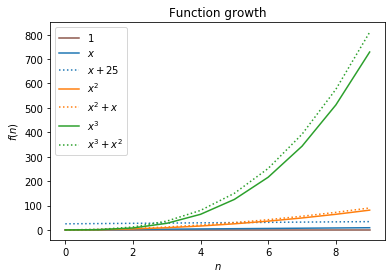

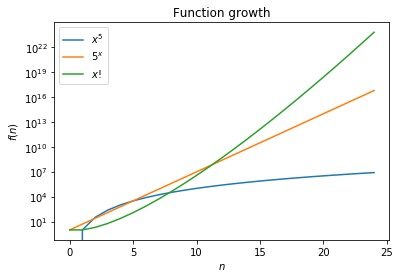

In [33]:
import matplotlib.pyplot as plt
from math import factorial

# Gráfica 1
ys0 = [1 for x in range(10)]
ys1 = [x for x in range(10)]
ys1_b = [x + 25 for x in range(10)]
ys2 = [x**2 for x in range(10)]
ys2_b = [x**2 + x for x in range(10)]
ys3 = [x**3 for x in range(10)]
ys3_b = [x**3 + x**2 for x in range(10)]

fig = plt.figure()
plt.plot(range(10), ys0, '-', color='tab:brown')
plt.plot(range(10), ys1, '-', color='tab:blue')
plt.plot(range(10), ys1_b, ':', color='tab:blue')
plt.plot(range(10), ys2, '-', color='tab:orange')
plt.plot(range(10), ys2_b, ':', color='tab:orange')
plt.plot(range(10), ys3, '-', color='tab:green')
plt.plot(range(10), ys3_b, ':', color='tab:green')

plt.legend(["$1$", "$x$", "$x+25$", "$x^2$", "$x^2+x$", "$x^3$",
            "$x^3+x^2$"])
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.title('Function growth')
plt.show()

# Gráfica 2
ys0 = [x**5 for x in range(25)]
ys1 = [5**x for x in range(25)]
ys2 = [factorial(x) for x in range(25)]

fig = plt.figure()
plt.plot(range(25), ys0)
plt.plot(range(25), ys1)
plt.plot(range(25), ys2)

plt.legend(["$x^5$", "$5^x$", "$x!$"])
plt.yscale("log")
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.title('Function growth')
plt.show()

In [52]:
# Respuesta

2. En el código de ejemplo de la sección 4, que analizaba un conjunto de datos sobre la afectación de una pandemia, hemos añadido las dos funciones, que devuelven los valores máximos y mínimos encontrados en una columna del `dataframe` , especificada como parámetro:

2.1. Escribid un caso de prueba para la función `get_min_value`, para las columnas `deaths` y `dateRep`.

2.2. Escribid un caso de prueba para la función `get_max_value`, para las columnas `deaths` y `dateRep`.

2.3. Cread una *suite* con los dos casos de prueba y ejecutadla.

2.4. Si habéis detectado algún error, modificad las funciones `get_min_value` y `get_max_value` para controlarlo. Volved a ejecutar la *suite* y comprobad que, efectivamente, las modificaciones realizadas consiguen una correcta ejecución de las funciones.

In [35]:
def get_min_value(df, col):
    """
    Return the minimum value found in column `col`
        of the dataframe `df`.
    """
    return min(df[col])


def get_max_value(df, col):
    """
    Return the maximum value found in column `col`
        of the dataframe `df`.
    """
    return max(df[col])

In [53]:
# Respuesta

3. Responded a las siguientes preguntas en relación al entorno de programación en Python que hay en la máquina virtual:

3.1. ¿Qué versión de `numpy` hay instalada?

3.2. ¿En qué puerto se encuentra escuchando el servidor de `jupyter`?

3.3. ¿Cuál es el repositorio de `git` de donde se ha descargado este *notebook*?

**Respuesta:**


## 7.1.- Soluciones a los ejercicios para practicar

1. A continuación se encuentra un fragmento de código que genera dos gráficas, que muestran un conjunto de funciones. La generación de las dos gráficas contiene código duplicado, que podría eliminarse haciendo *refactoring*.

Aplicad *refactoring* para evitar la repetición de código. Recordad que el *refactoring* no altera el comportamiento del código y, por lo tanto, el código que creéis debe seguir generando las mismas dos gráficas.

In [37]:
%matplotlib inline

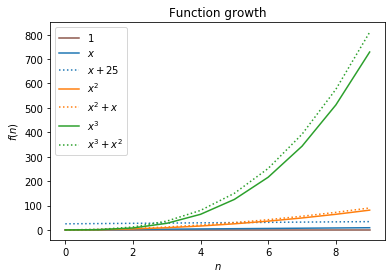

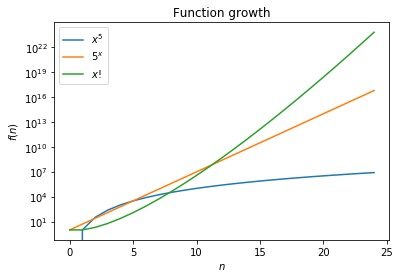

In [38]:
# Código original (del enunciado)
import matplotlib.pyplot as plt
from math import factorial

# Gráfica 1
ys0 = [1 for x in range(10)]
ys1 = [x for x in range(10)]
ys1_b = [x + 25 for x in range(10)]
ys2 = [x**2 for x in range(10)]
ys2_b = [x**2 + x for x in range(10)]
ys3 = [x**3 for x in range(10)]
ys3_b = [x**3 + x**2 for x in range(10)]

fig = plt.figure()
plt.plot(range(10), ys0, '-', color='tab:brown')
plt.plot(range(10), ys1, '-', color='tab:blue')
plt.plot(range(10), ys1_b, ':', color='tab:blue')
plt.plot(range(10), ys2, '-', color='tab:orange')
plt.plot(range(10), ys2_b, ':', color='tab:orange')
plt.plot(range(10), ys3, '-', color='tab:green')
plt.plot(range(10), ys3_b, ':', color='tab:green')

plt.legend(["$1$", "$x$", "$x+25$", "$x^2$", "$x^2+x$", "$x^3$",
            "$x^3+x^2$"])
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.title('Function growth')
plt.show()

# Gráfica 2
ys0 = [x**5 for x in range(25)]
ys1 = [5**x for x in range(25)]
ys2 = [factorial(x) for x in range(25)]

fig = plt.figure()
plt.plot(range(25), ys0)
plt.plot(range(25), ys1)
plt.plot(range(25), ys2)

plt.legend(["$x^5$", "$5^x$", "$x!$"])
plt.yscale("log")
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.title('Function growth')
plt.show()

In [39]:
# Respuesta


# Función que genera los plots, con parámetros que permiten configurarlos
def plot_funs(xs, funs, legs, colors, stys, ylog=False,
              title='Function growth', xlabel='$n$', ylabel='$f(n)$'):

    fig = plt.figure()

    for (f, col, sty) in zip(funs, colors, stys):
        ys = [f(x) for x in xs]
        plt.plot(xs, ys, sty, color=col)

    if ylog:
        plt.yscale("log")

    plt.legend(legs)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

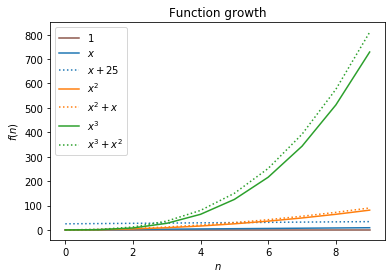

In [40]:
# Gráfica 1

xs = range(10)
funs = [lambda x: 1, lambda x: x, lambda x: x + 25,
        lambda x: x**2, lambda x: x**2 + x,
        lambda x: x**3, lambda x: x**3 + x**2]
legs = ["$1$", "$x$", "$x+25$",
        "$x^2$", "$x^2+x$",
        "$x^3$", "$x^3+x^2$"]
colors = ['tab:brown', 'tab:blue', 'tab:blue',
          'tab:orange', 'tab:orange',
          'tab:green', 'tab:green']
stys = ['-', '-', ':', '-', ':', '-', ':']

plot_funs(xs, funs, legs, colors, stys)

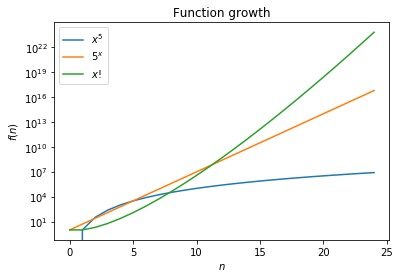

In [41]:
# Gráfica 2

xs = range(25)
funs = [lambda x: x**5, lambda x: 5**x, lambda x: factorial(x)]
legs = ["$x^5$", "$5^x$", "$x!$"]
colors = ['tab:blue', 'tab:orange', 'tab:green']
stys = ['-', '-', '-']

plot_funs(xs, funs, legs, colors, stys, ylog=True)

2. En el código de ejemplo de la sección 4, que analizaba un conjunto de datos sobre la afectación de una pandemia, hemos añadido las dos funciones, que devuelven los valores máximos y mínimos encontrados en una columna del `dataframe` , especificada como parámetro:

2.1. Escribid un caso de prueba para la función `get_min_value`, para las columnas `deaths` y `dateRep`.

2.2. Escribid un caso de prueba para la función `get_max_value`, para las columnas `deaths` y `dateRep`.

2.3. Cread una *suite* con los dos casos de prueba y ejecutadla.

2.4. Si habéis detectado algún error, modificad las funciones `get_min_value` y `get_max_value` para controlarlo. Volved a ejecutar la *suite* y comprobad que, efectivamente, las modificaciones realizadas consiguen una correcta ejecución de las funciones.

In [42]:
def get_min_value(df, col):
    """
    Return the minimum value found in column `col`
        of the dataframe `df`.
    """
    return min(df[col])


def get_max_value(df, col):
    """
    Return the maximum value found in column `col`
        of the dataframe `df`.
    """
    return max(df[col])

In [54]:
# Respuesta
# 2.1


class TestMinValue(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        print("Loading dataset")
        cls._df = pd.read_csv("data/COVID-19.csv")

    def test_deaths(self):
        print("Starting test_deaths")
        # Min deaths can not be negative
        self.assertTrue(get_min_value(self._df, "deaths") >= 0)

    def test_dateRep(self):
        print("Starting test_dateRep")
        # Min date should have year 2019 (start of the pandemic)
        m = get_min_value(self._df, "dateRep")
        y = m.split("/")
        self.assertTrue(y[2] == "2019")


# 2.2
class TestMaxValue(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        print("Loading dataset")
        cls._df = pd.read_csv("data/COVID-19.csv")

    def test_deaths(self):
        print("Starting test_deaths")
        # Max deaths can not be negative
        self.assertTrue(get_max_value(self._df, "deaths") >= 0)
        # Max deaths can not be higher than max cases
        d = get_max_value(self._df, "deaths")
        c = get_max_value(self._df, "cases")
        self.assertTrue(d <= c)

    def test_dateRep(self):
        print("Starting test_dateRep")
        # Max date should have year 2020 (file contains data until mid-2020)
        m = get_max_value(self._df, "dateRep")
        y = m.split("/")
        self.assertTrue(y[2] == "2020")

In [55]:
# 2.3
suite = unittest.TestSuite()
suite.addTest(unittest.makeSuite(TestMinValue))
suite.addTest(unittest.makeSuite(TestMaxValue))
unittest.TextTestRunner(verbosity=2).run(suite)

test_dateRep (__main__.TestMinValue) ... ok
test_deaths (__main__.TestMinValue) ... ok
test_dateRep (__main__.TestMaxValue) ... ok
test_deaths (__main__.TestMaxValue) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.105s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

In [56]:
# Efectivamente, si observamos el resultado de estas funciones para
# la columna "dateRep", podemos comprobar cómo devuelven valores erróneos
print("Max is: {}".format(get_max_value(df, "dateRep")))
print("Min is: {}".format(get_min_value(df, "dateRep")))

In [46]:
# Analizando el tipo de datos de las columnas, podemos ver
# cuál es el problema (se aplica min() sobre una cadena de
# caracteres, por lo que se considera el orden lexicográfico)
df.dtypes

dateRep                     object
day                          int64
month                        int64
year                         int64
cases                        int64
deaths                       int64
countriesAndTerritories     object
geoId                       object
countryterritoryCode        object
popData2018                float64
continentExp                object
dtype: object

In [47]:
# 2.4

from pandas.api.types import is_string_dtype
import numpy as np


def get_min_value(df, col):
    """
    Return the minimum value found in column `col`
        of the dataframe `df`.
    """
    if is_string_dtype(df[col]):
        # Si la columna es de tipo cadena de caracteres, la convertimos
        # a datetime antes de calcular el mínimo
        i = np.argmin(np.array(pd.to_datetime(df[col])))
        return df[col][i]
    else:
        return min(df[col])


def get_max_value(df, col):
    """
    Return the maximum value found in column `col`
        of the dataframe `df`.
    """
    if is_string_dtype(df[col]):
        # Si la columna es de tipo cadena de caracteres, la convertimos
        # a datetime antes de calcular el máximo
        i = np.argmax(np.array(pd.to_datetime(df[col])))
        return df[col][i]
    else:
        return max(df[col])

In [48]:
# Volvemos a ejecutar la suite de tests
suite = unittest.TestSuite()
suite.addTest(unittest.makeSuite(TestMinValue))
suite.addTest(unittest.makeSuite(TestMaxValue))
unittest.TextTestRunner(verbosity=2).run(suite)

test_dateRep (__main__.TestMinValue) ... ok
test_deaths (__main__.TestMinValue) ... ok
test_dateRep (__main__.TestMaxValue) ... ok
test_deaths (__main__.TestMaxValue) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.075s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

3. Responded a las siguientes preguntas en relación al entorno de programación en Python que hay en la máquina virtual:

3.1. ¿Qué versión de `numpy` hay instalada?

**Respuesta:**

Podemos comprobarlo ejecutando:

```
$ pip freeze | grep numpy
```
y obtendremos: `numpy==1.17.0`

3.2. ¿En qué puerto se encuentra escuchando el servidor de `jupyter`?

**Respuesta:**

El servidor de `jupyter` se encuentra en el puerto `8888`, tal como se indica en la consola al lanzarlo:

```
The Jupyter Notebook is running at:
http://localhost:8888/?token=****
```

3.3. ¿Cuál es el repositorio de `git` de donde se ha descargado este *notebook*?

**Respuesta:**

El *notebook* sobre el que trabajamos se encuentra en el repositorio:
https://eimtgit.uoc.edu/prog_datasci_2/resources/unit_6

tal y como podemos ver en el *script* `get_content.sh` que usamos para descargar el contenido de la asignatura, o bien ejecutando:

```
git config --get remote.origin.url
```

desde la copia en local del repositorio.

# 8.- Bibliografía


## 8.1.- Bibliografía básica

La bibliografía básica de esta unidad es el contenido explicado en el *notebook* (no es necesario consultar ningún enlace externo).


## 8.2.- Bibliografía adicional - Ampliación de conocimientos

Esta unidad presenta una recopilación de conceptos y herramientas relacionados con la programación en Python, y que van más allá del código en sí mismo. Cada uno de estas conceptos y herramientas es todo un mundo por sí mismo, del que aquí sólo hemos presentado una pequeña introducción.

* **Organización y distribución de código**: Si estáis interesados en aprender detalles adicionales sobre la estructuración en paquetes de código Python, os recomendamos la lectura [del artículo siguiente](https://intermediate-and-advanced-software-carpentry.readthedocs.io/en/latest/structuring-python.html) del curso de programación en Python de T. Brown. Por otro lado, si deseáis conocer el proceso de preparar un paquete Python para su distribución, se recomienda la lectura de la [documentación oficial de `setuptools`](https://setuptools.readthedocs.io/en/latest/setuptools.html).

* **Git**: Esta sección sólo incluye una muy breve introducción a git. Para acabar de entender los conceptos claves de git, se recomienda consultar estos tres vídeo-tutoriales ([1](https://www.youtube.com/watch?v=8oRjP8yj2Wo), [2](https://www.youtube.com/watch?v=uhtzxPU7Bz0), [3](https://www.youtube.com/watch?v=7w5Z7LmyLgI)) de las guías oficiales que explican más visualmente las ideas sobre las que se construye git. Por otro lado, si deseáis ir más allá de estos conceptos clave, os recomendamos la lectura de la [git pocket guide](https://www.oreilly.com/library/view/git-pocket-guide/9781449327507/ch01.html), y consultar la página [recursos de GitHub](https://try.github.io/), que contiene varios tutoriales interactivos.

* **Testing**: Podéis revisar la [tabla de la documentación oficial](https://docs.python.org/3.8/library/unittest.html#unittest.TestCase.debug) para ver un resumen de todas las sentencias *assert* disponibles en el módulo.

* **Programación orientada a objetos:** En uno de los ejemplos de `unittest`, se ha utilizado el decorador `@classmethod`. Investigad sobre qué son los decoradores en Python y, en concreto, por qué se utiliza `@classmethod`.